<a href="https://colab.research.google.com/github/randomprogram/ML-examples/blob/master/CompressedSensing_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Compressed Sensing example.**
by Deqiang Qiu at Computational Neuroimaging and Neuroscience Lab (CN2L) at Emory University
##General Theory

Consider the following linear equation:

$A\cdot X =b$, where $A\in R^{m\times n}$, $X \in R^{n \times 1}$ and $b \in R^{n \times 1}$. 

when $m < n$ (i.e. there are less number of equations than the number of unknowns) the system is underdetermined and there are infinite number of $X$ that satisfy the equation. However, there is recent theoratical and practical efforts that show that when $X$ is sparse (meaning many of the elements of $X$ are zero ) and matrix $A$ satistifies certain requirement, $X$ can be recovered exactly. Theory proves that when the entries of $A$ are random, $X$ can be recovered with probability approaching 1. In practice, $A$ can be random selection of Fourier transformation or discrete consine transformation. Under the condition that the measurement of $b$ is noisy, which is often the case, the solution is obtained by solving the following convex optimization problem:

$X^* = \underset{X}{argmin} { } |A\cdot X - b|_2^2 + \lambda |X|_1$

where the first term on the right hand side of the equation encourages data fit, and the second term is the L1 norm of $X$, which is what drives the solution to be sparse compared to say a L2 norm.

References: 
1. . J. Candès, J. Romberg and T. Tao. Robust uncertainty principles: exact signal reconstruction from highly incomplete frequency information. IEEE Trans. Inform. Theory, 52 489-509. 






##Demo
Some of the codes are based on [this nice demo](http://www.pyrunner.com/weblog/2016/05/26/compressed-sensing-python/)
###L1 norm fit vs L2 norm fit
Consider a function

$y = 0.5 x + 3 + \epsilon \tag {Eq. 1}$

, where $\epsilon \in \textbf {N}(0,\delta)$, i.e. $\epsilon$ is a random variable with normal distribution with zero mean and a standard deviation of $\delta$.

We will generate a random data points using this equation

In [0]:
#import libraries needed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

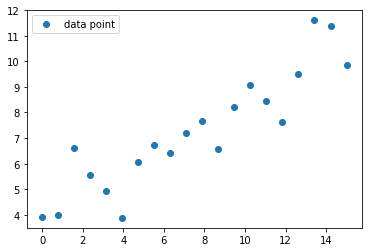

In [4]:
#generate x, y and plot them
x = np.linspace(0, 15, 20)
std = 1
y = 0.5 * x + 3 + np.random.normal(0,std,len(x))
plt.plot(x, y,'o')
plt.legend(['data point'])

We then use the optimize module from scipy to perform a linear fit to the data by minimizing L1 norm and L2 norm of the residuals, i.e. the misfit between the linear model and the actual data. If we do well we should get a slope close to 0.5 and an intercept close to 3 (see Eq. 1).

In [0]:
# form a linear model by defining an function, coeff[0] is the intercept and coeff[1] is the slope
linModel = lambda coeff, x: coeff[0] + coeff[1] * x

#l1 norm is the 